In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('../DataSets/LP_Train.csv')

In [4]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
# for filling null values

df.Gender=df.Gender.fillna('Male')
df.Married=df.Married.fillna('Yes')
df.Dependents=df.Dependents.fillna(0)
df.Self_Employed=df.Self_Employed.fillna('No')
df.LoanAmount=df.LoanAmount.fillna(113.73)
df.Loan_Amount_Term=df.Loan_Amount_Term.fillna(344.53)
df.Credit_History=df.Credit_History.fillna(1.0)

In [9]:
df.Dependents=df.Dependents.replace('[+]','',regex=True).astype('int64')
df.CoapplicantIncome=df.CoapplicantIncome.replace('[+e]','',regex=True)

In [9]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [10]:
cat_cols=['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
for i in cat_cols:
    print(df[i].value_counts(),'\n')

Gender
Male      502
Female    112
Name: count, dtype: int64 

Married
Yes    401
No     213
Name: count, dtype: int64 

Dependents
0    360
1    102
2    101
3     51
Name: count, dtype: int64 

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64 

Self_Employed
No     532
Yes     82
Name: count, dtype: int64 

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64 



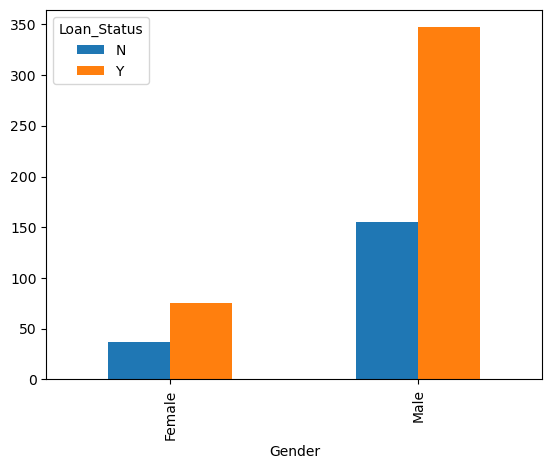

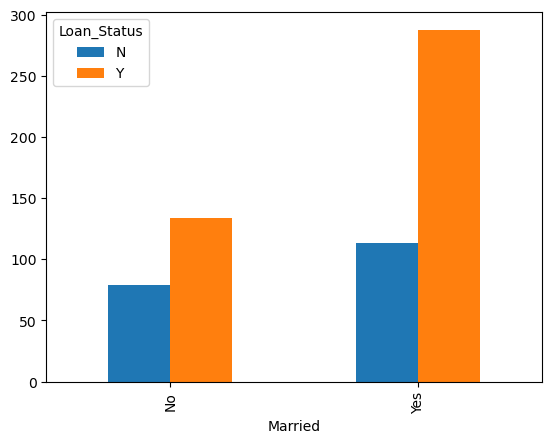

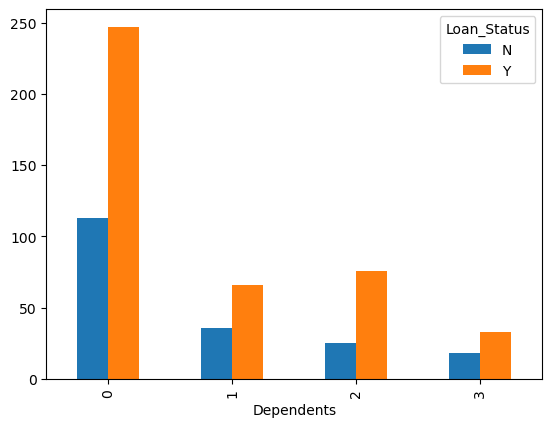

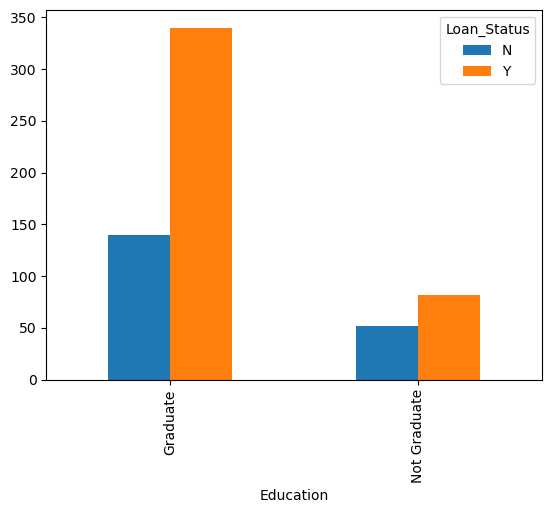

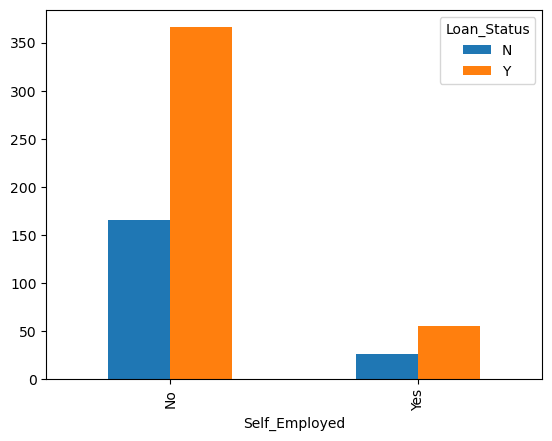

In [11]:
cols=['Gender','Married','Dependents','Education','Self_Employed']
for col in cols:
    pd.crosstab(df[col],df['Loan_Status']).plot(kind='bar')
    plt.show()

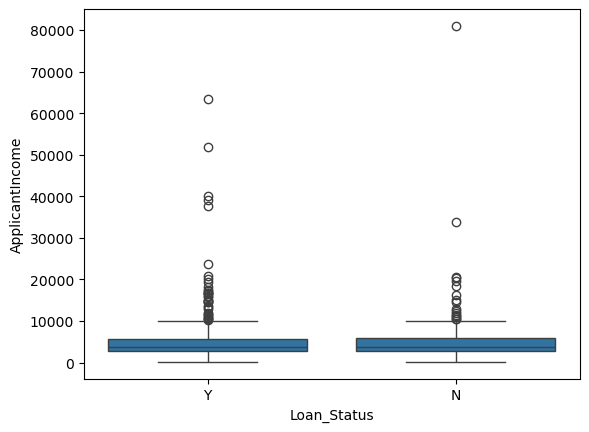

In [12]:
sb.boxplot(x=df.Loan_Status,y=df.ApplicantIncome)
plt.show()

In [13]:
i='ApplicantIncome'
q1=np.percentile(df[i],25)
q3=np.percentile(df[i],75)

iqr=q3-q1

c1=q1-1.5*(iqr)
c2=q1+1.5*(iqr)

In [14]:
w=df[(df[i]>c2)|(df[i]<c1)]

In [15]:
w=w.index

In [16]:
w

Index([  9,  20,  25,  34,  54,  58,  67,  88, 102, 106, 107, 113, 115, 119,
       126, 128, 130, 138, 144, 146, 148, 152, 155, 157, 161, 164, 169, 171,
       183, 185, 189, 191, 196, 199, 210, 212, 223, 233, 246, 254, 258, 271,
       278, 284, 289, 308, 309, 319, 324, 325, 333, 334, 350, 351, 356, 369,
       370, 372, 376, 390, 391, 404, 408, 409, 424, 430, 432, 435, 438, 441,
       443, 444, 459, 461, 467, 475, 478, 483, 484, 487, 493, 506, 509, 523,
       525, 533, 534, 557, 561, 564, 572, 592, 594, 598, 604, 611, 612],
      dtype='int64')

In [17]:
df=df.drop(labels=w,axis=0)

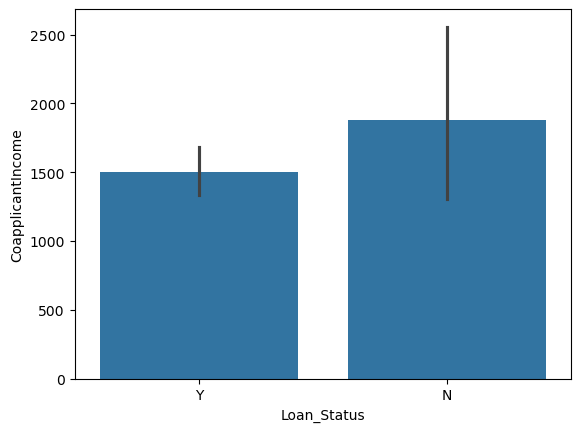

In [12]:
sb.barplot(x=df.Loan_Status,y=df.CoapplicantIncome)
plt.show()

In [23]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount']].corr(numeric_only=True)

,ApplicantIncome,CoapplicantIncome,LoanAmount
ApplicantIncome,1.000000,-0.352590,0.400487
CoapplicantIncome,-0.352590,1.000000,0.294139
LoanAmount,0.400487,0.294139,1.000000


In [13]:
df.groupby(['Gender','Married','Education'])['LoanAmount'].sum()

Gender  Married  Education   
Female  No       Graduate         7787.73
                 Not Graduate     1496.73
        Yes      Graduate         4126.73
                 Not Graduate      740.00
Male    No       Graduate        14803.92
                 Not Graduate     3257.73
        Yes      Graduate        46625.57
                 Not Graduate    10339.65
Name: LoanAmount, dtype: float64

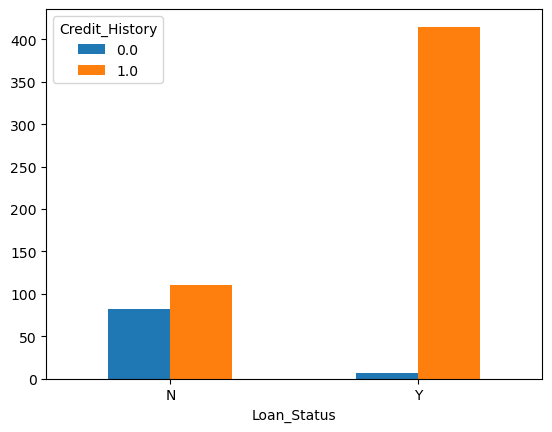

In [15]:
pd.crosstab(df['Loan_Status'],df['Credit_History']).plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

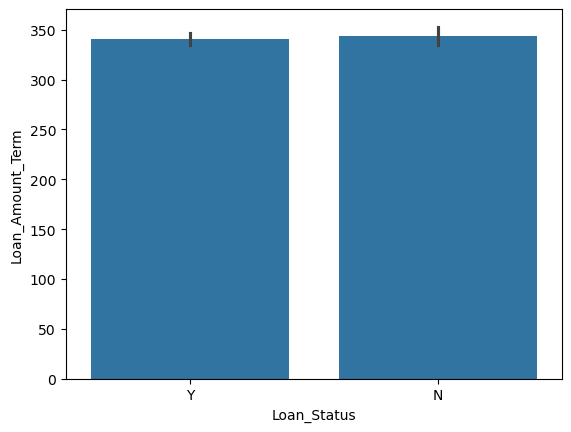

In [16]:
sb.barplot(x=df.Loan_Status,y=df.Loan_Amount_Term)
plt.show()

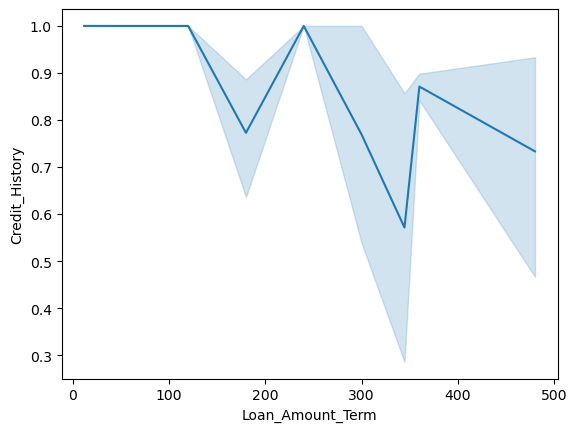

In [17]:
sb.lineplot(x=df.Loan_Amount_Term,y=df.Credit_History)
plt.show()

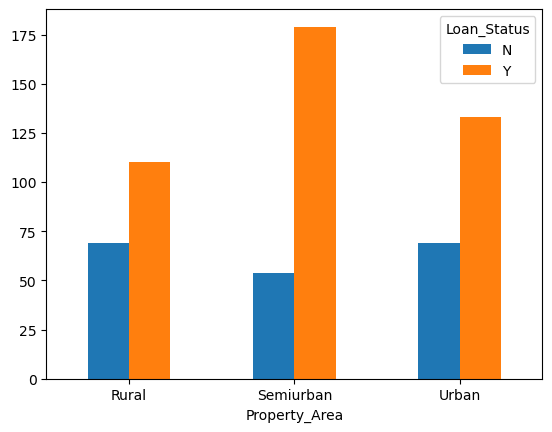

In [18]:
pd.crosstab(df['Property_Area'],df['Loan_Status']).plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

In [21]:
df.groupby('Property_Area')[['LoanAmount','Loan_Amount_Term']].sum()

,LoanAmount,Loan_Amount_Term
Property_Area,,
Rural,27023.38,61846.12
Semiurban,33743.65,80869.59
Urban,28411.03,67307.71
